In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\anamitra.b\OneDrive - Nihilent Limited\Desktop\Python Projects\EPL_20_21.csv")
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0


### EDA and Data Cleaning


In [6]:
df.shape

(532, 18)

In [13]:
df.info() # this also checks whether we have any null values  and the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [16]:
df.isnull().sum() # checking the missing values (there are no null values present in the dataset)

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [9]:
df.describe() # summary statistics of numerical columns

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [11]:
df.describe(include='object') # summary statistics of categorical columns

,Name,Club,Nationality,Position
count,532,532,532,532
unique,524,20,59,10
top,Joe Willock,West Bromwich Albion,ENG,DF
freq,2,30,192,178


In [14]:
for col in df.describe(include = 'object').columns:
    print (col)
    print(df[col].unique())
    print('-'*50) # checking out the unqiue values for each cateogrical column

Name
['Mason Mount' 'Edouard Mendy' 'Timo Werner' 'Ben Chilwell' 'Reece James'
 'César Azpilicueta' "N'Golo Kanté" 'Jorginho' 'Thiago Silva' 'Kurt Zouma'
 'Mateo Kovačić' 'Antonio Rüdiger' 'Christian Pulisic' 'Kai Havertz'
 'Andreas Christensen' 'Hakim Ziyech' 'Tammy Abraham' 'Marcos Alonso'
 'Callum Hudson-Odoi' 'Olivier Giroud' 'Kepa Arrizabalaga' 'Billy Gilmour'
 'Willy Caballero' 'Ruben Loftus-Cheek' 'Emerson Palmieri' 'Fikayo Tomori'
 'Ross Barkley' 'Ederson' 'Rúben Dias' 'Rodri' 'Raheem Sterling'
 'João Cancelo' 'Bernardo Silva' 'İlkay Gündoğan' 'Kevin De Bruyne'
 'Riyad Mahrez' 'Gabriel Jesus' 'Kyle Walker' 'John Stones' 'Phil Foden'
 'Oleksandr Zinchenko' 'Ferrán Torres' 'Aymeric Laporte' 'Fernandinho'
 'Benjamin Mendy' 'Nathan Aké' 'Sergio Agüero' 'Eric García'
 'Scott Carson' 'Zack Steffen' 'Liam Delap' 'Bruno Fernandes'
 'Aaron Wan-Bissaka' 'Harry Maguire' 'Marcus Rashford' 'Luke Shaw'
 'Victor Lindelöf' 'Fred' 'David de Gea' 'Scott McTominay' 'Paul Pogba'
 'Mason Greenwood'

In [19]:
# create 2 new columns
df['Mins_per_match'] = (df['Mins']/df['Matches']).astype(int)
df['Goals_per_match'] = (df['Goals']/df['Matches']).astype(float)

In [21]:
df # We can see that the two new columns have been added

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_match,Goals_per_match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,26,0.000000
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,90,0.000000
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0,12,0.000000
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0,11,0.000000


In [23]:
# Total Goals scored in the whole season
total_goals = df['Goals'].sum()
total_goals # a total of 986 goals scored

986

In [25]:
# Number of goals scored from a Penalty
penalty_goals = df['Penalty_Goals'].sum()
penalty_goals

102

In [26]:
# Number of Penalties attempted
penalty_att = df['Penalty_Attempted'].sum()
penalty_att

125

## Visualizations

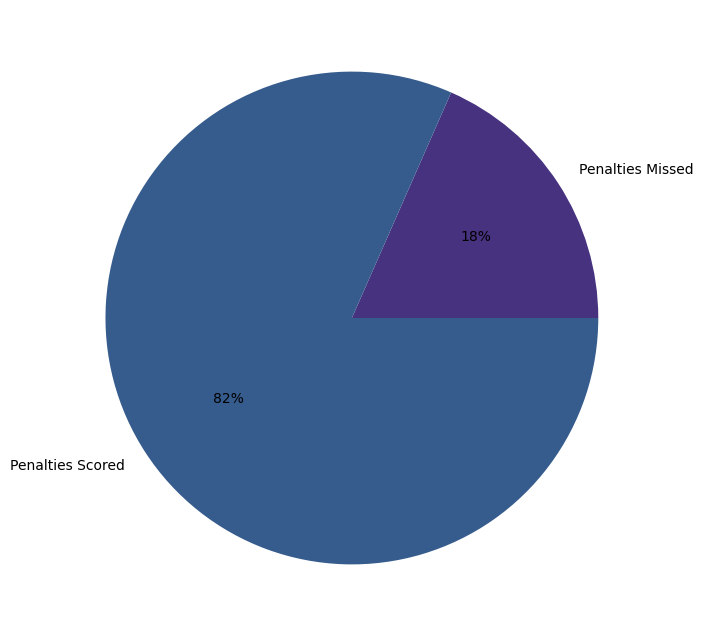

In [48]:
# Pie Chart for penalties scored vs penalties missed

plt.figure(figsize=(16,8))
penalty_not_scored = df['Penalty_Attempted'].sum() - penalty_goals
data = [penalty_not_scored,penalty_goals]
labels = ['Penalties Missed','Penalties Scored']
color = sns.color_palette('viridis')
plt.pie(data,labels = labels,colors = color,autopct = '%.0f%%')
plt.show()


### From the above pie chart, it can be concluded that over the whole season 82% of the number of penalties have been scored.

In [32]:
# Number of unique postions
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [35]:
# Total number of FW players
df[df['Position']=='FW'] # 81 Players played in the EPL 2020-21 season as Forwards

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_match,Goals_per_match
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [38]:
# Players from Different nations
np.size((df['Nationality']).unique()) # There a re a total of 59 nations being represented in the EPL 2020-21 season

59

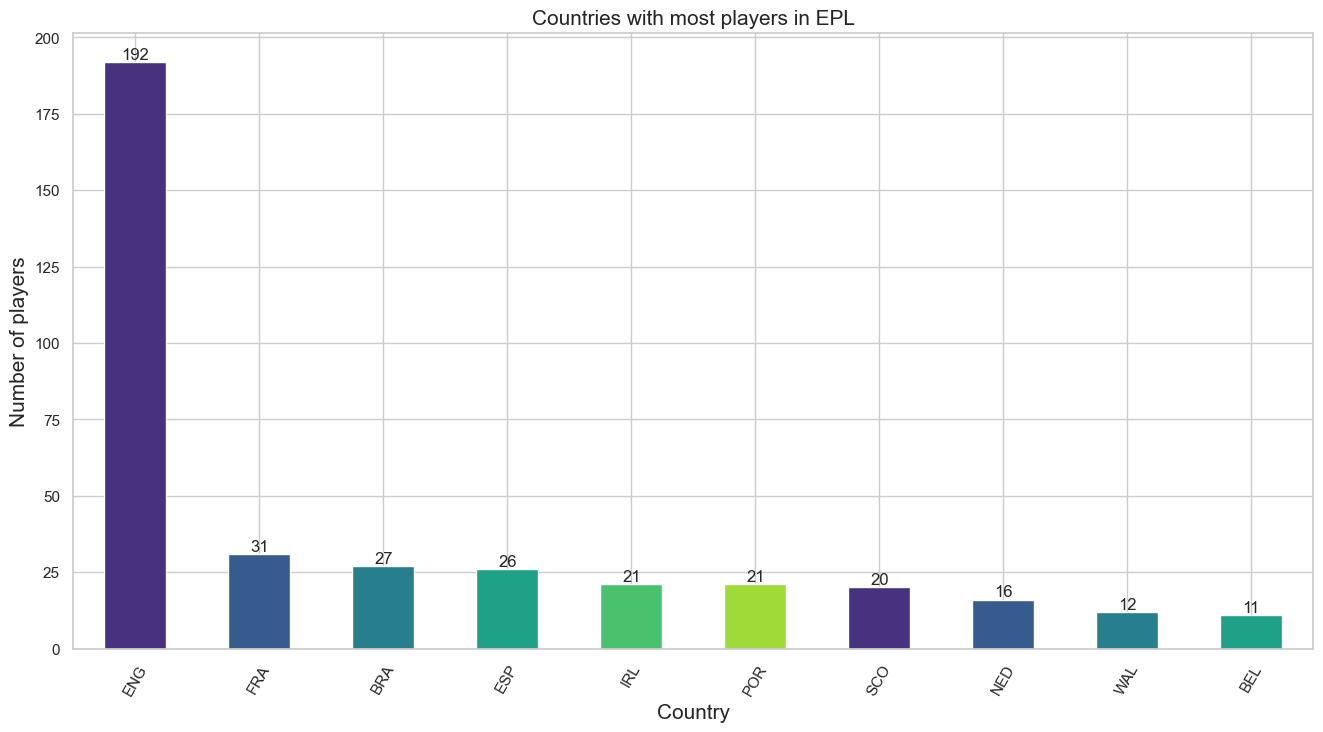

In [106]:
# Most players from which countries
nationality = df.groupby('Nationality').size().sort_values(ascending = False)
ax = nationality.head(10).plot(kind ='bar',figsize = (16,8),color = sns.color_palette ('viridis'))
plt.title('Countries with most players in EPL',fontsize = 15)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Number of players',fontsize = 15)
plt.xticks(rotation=60)
for bars in ax.containers:
    ax.bar_label(bars)


### From the above bar chart it is clear most of the players are from England followed by France and Brazil.

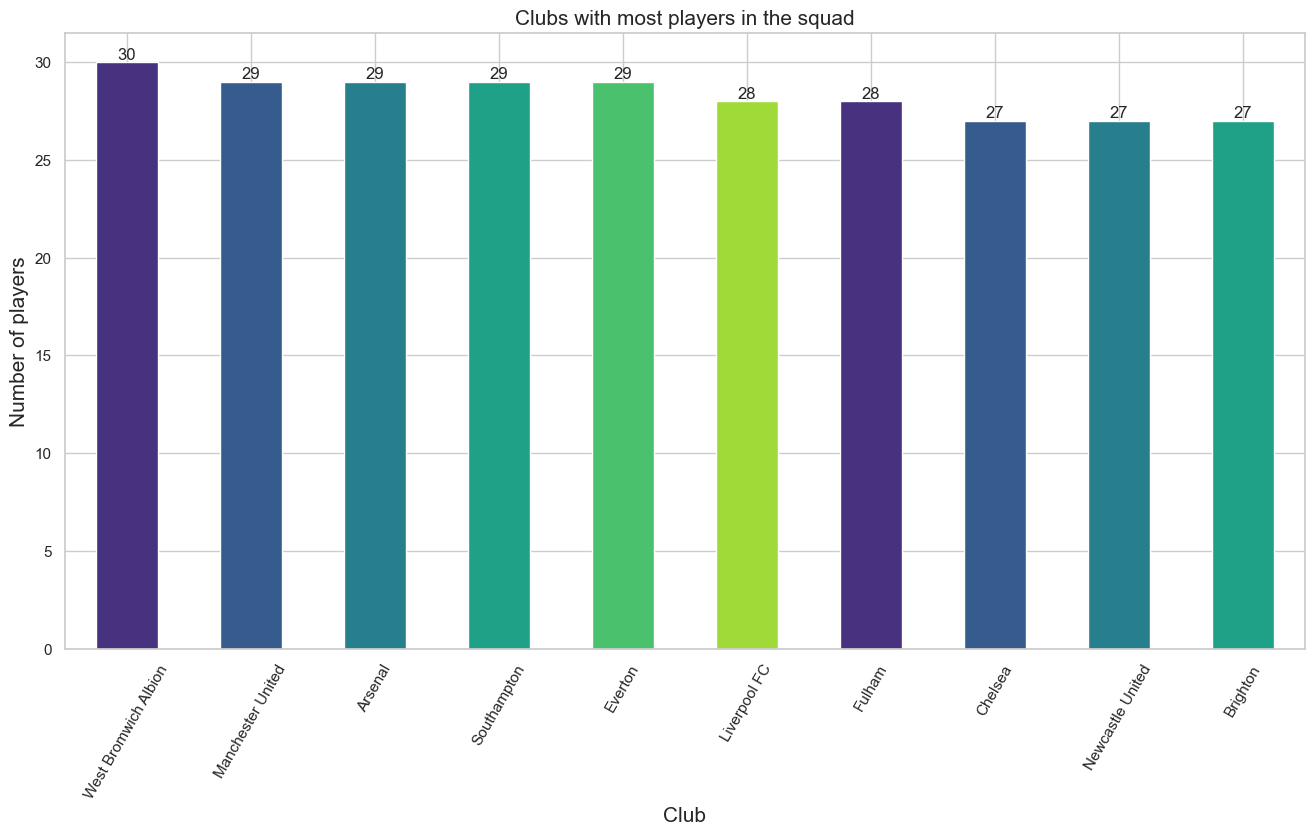

In [105]:
# Clubs with the maximum number of players in the sqaud
ax = df['Club'].value_counts().nlargest(10).plot(kind = 'bar', color = sns.color_palette('viridis'), figsize = (16,8))
plt.title('Clubs with most players in the squad',fontsize = 15)
plt.xlabel('Club', fontsize = 15)
plt.ylabel('Number of players',fontsize = 15)
plt.xticks(rotation=60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### WBA had 30 players, followed by ManU, Arsenal, Southampton and Everton with 29 players each.

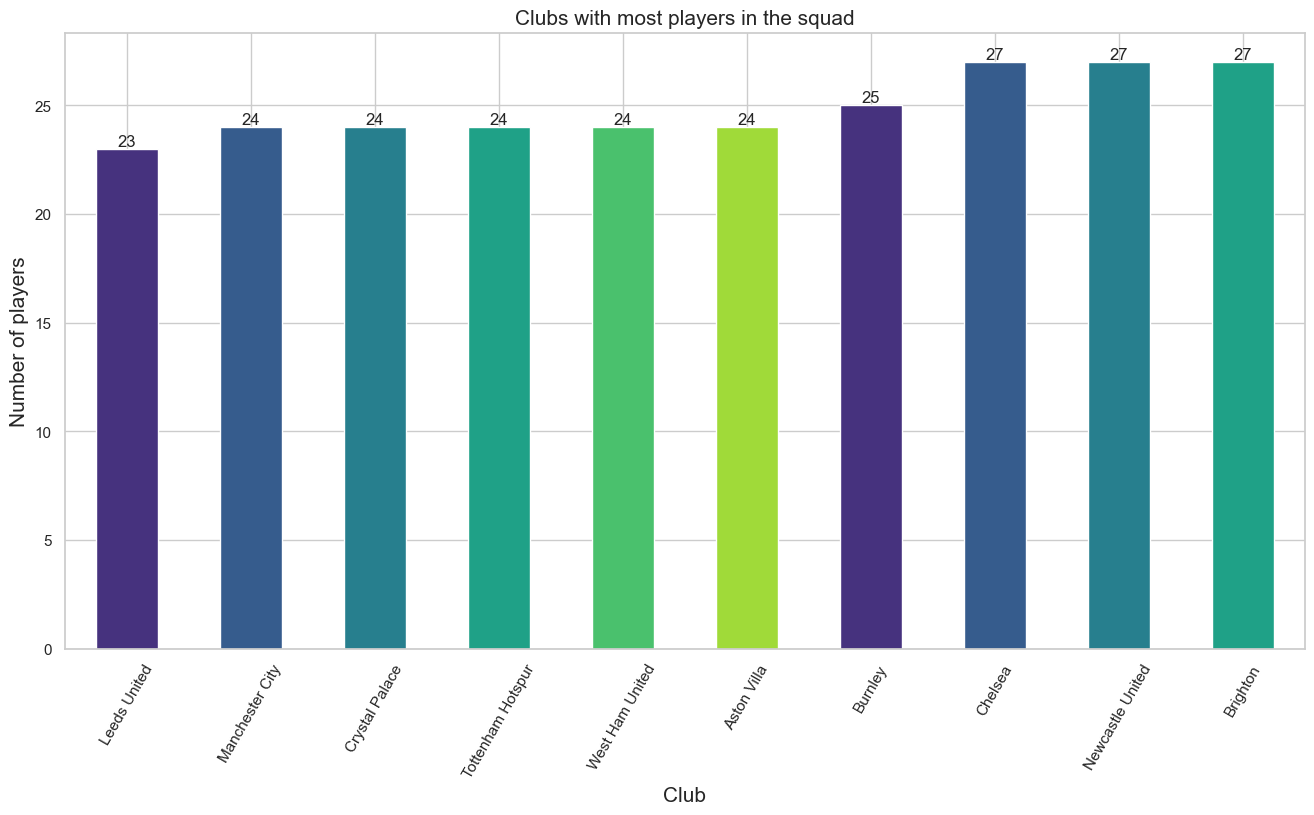

In [103]:
# Clubs with the least players in the squad
ax = df['Club'].value_counts().nsmallest(10).plot(kind = 'bar', color = sns.color_palette('viridis'), figsize = (16,8))
plt.title('Clubs with most players in the squad',fontsize = 15)
plt.xlabel('Club', fontsize = 15)
plt.ylabel('Number of players',fontsize = 15)
plt.xticks(rotation=60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Leeds United had the least players with 23 followed by Manchester City, Crystal Palace.

In [54]:
# Players based on age group

under_20 = df[df['Age']<=20]
age20_25 = df[(df['Age']>20) &(df['Age']<=25)]
age25_30 = df[(df['Age']>25) &(df['Age']<=30)]
above_30 = df[df['Age']>30]

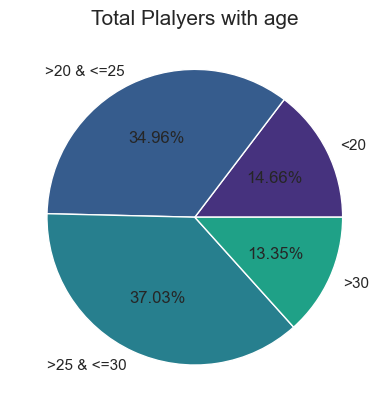

In [143]:
# Pie Chart for players based on different age groups
x = np.array([under_20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above_30['Name'].count()])
my_labels = ['<20','>20 & <=25','>25 & <=30','>30']
plt.title('Total Plalyers with age', fontsize =15)
color = sns.color_palette('viridis')
plt.pie(x, labels = my_labels, colors=color, autopct = '%.2f%%')
plt.show()

### From the above graph we can conclude that the highest percentage (37%) of players in EPL 2020-21 season was in the age group 25-30. And almsot 35% of the players are aged between 20-25, which suggests a significant rise in investment on youth players with potential.

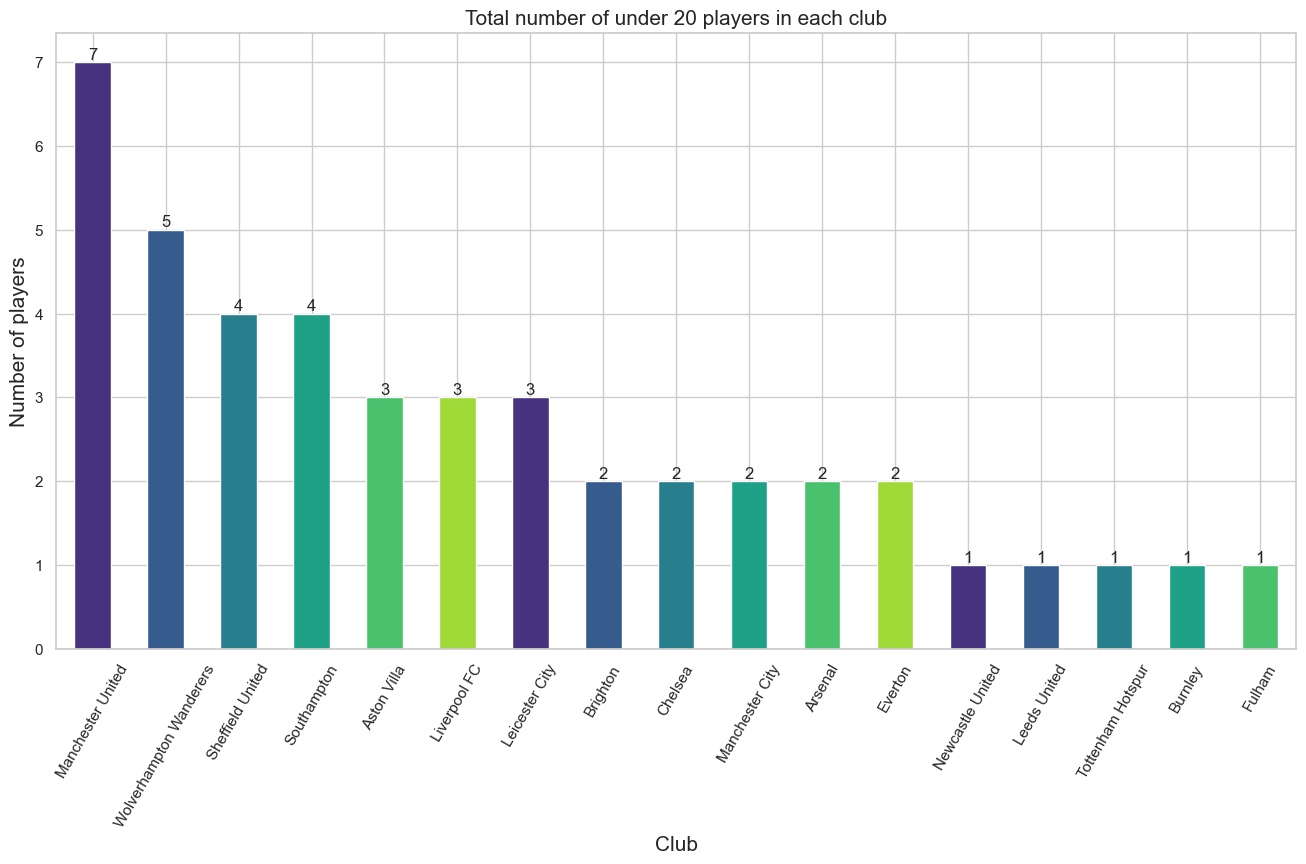

In [102]:
# Total number of under 20 players in each club
players_under_20 = df[df['Age']<20]
ax = players_under_20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette('viridis'), figsize = (16,8))
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Total number of under 20 players in each club',fontsize = 15)
plt.xlabel('Club',fontsize = 15)
plt.ylabel('Number of players',fontsize = 15)
plt.xticks(rotation = 60)
plt.show()

### From the above graph we can conclude that apart from Manchested United, no other top 6 club had significantly invested in youth for the season.

In [64]:
# All the players aged under 20 in ManU
players_under_20[players_under_20['Club']=='Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_match,Goals_per_match
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [65]:
# All the players aged under 20 in Chelsea
players_under_20[players_under_20['Club']=='Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_per_match,Goals_per_match
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


Text(0.5, 1.0, 'Average age of players in each club')

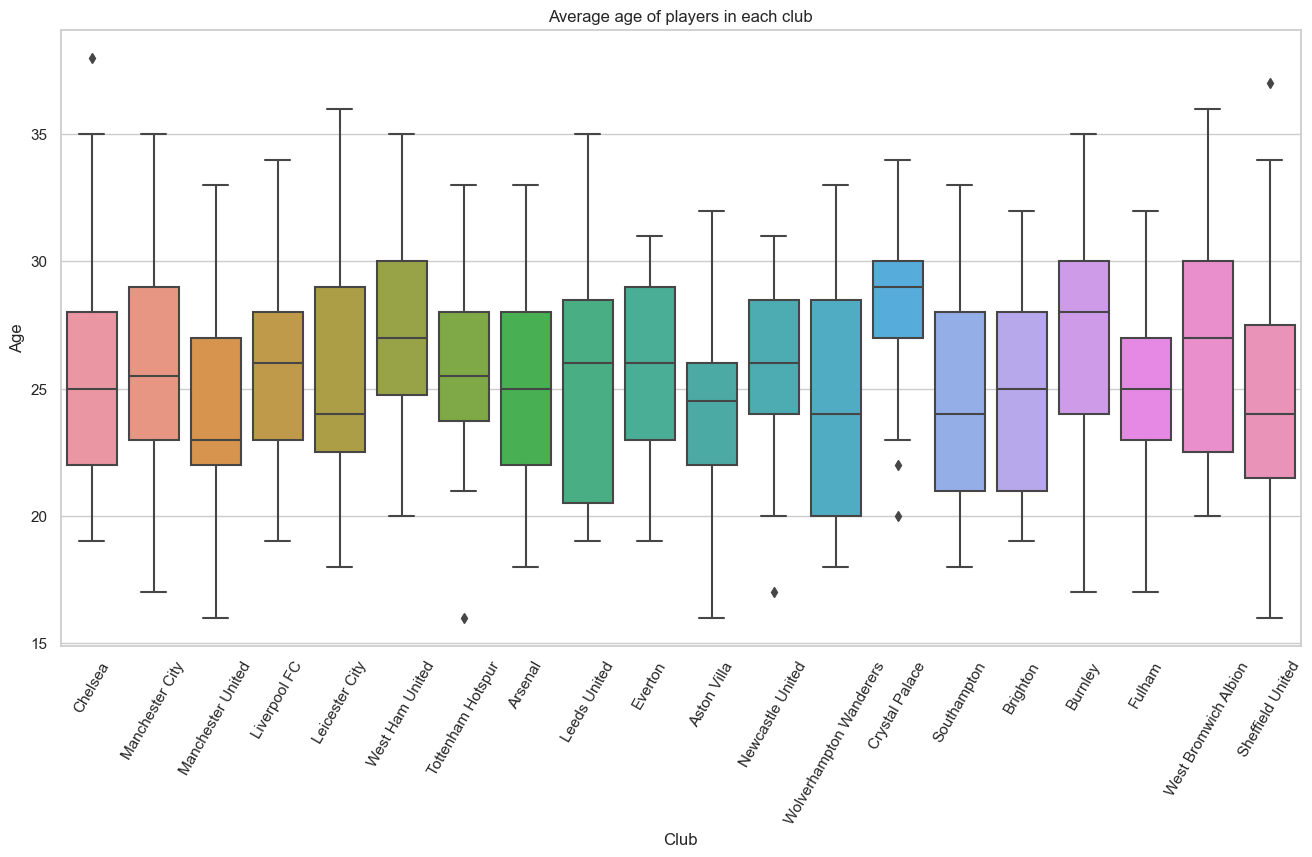

In [101]:
# Average age of players in each club
plt.figure(figsize =(16,8))
ax = sns.boxplot(data = df, x = 'Club', y = 'Age')
plt.xticks(rotation=60)
plt.title('Average age of players in each club')

In [74]:
num_player = df.groupby('Club').size()
data = (df.groupby('Club')['Age'].sum())/num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

### From the above plot, it is clear that Crystal Palace has the highest average age as a squad and Manchested United has the lowest average age. This supports our inference that Manchested United have a significantly higher investment in youth compared to other clubs.

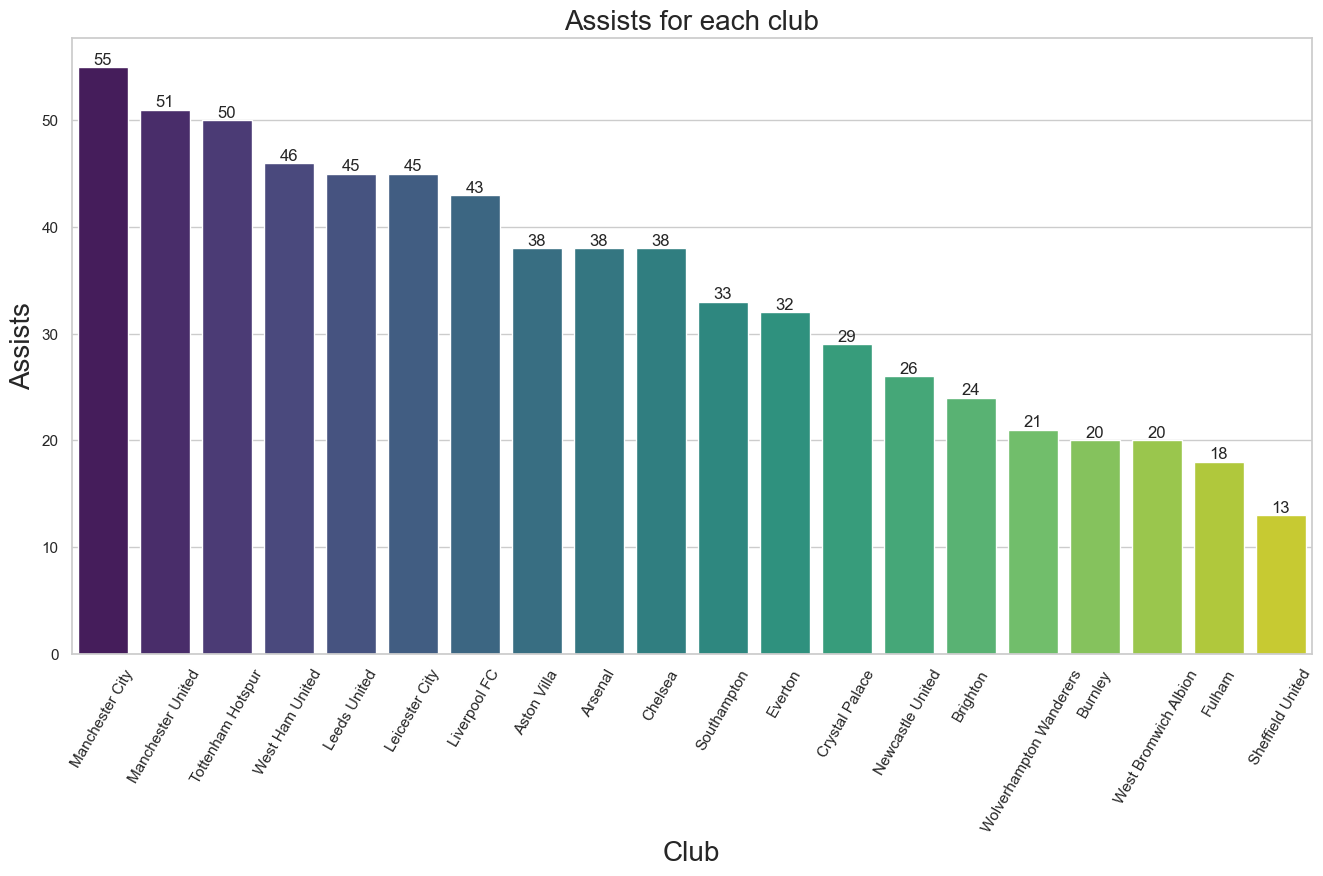

In [97]:
# Total assists from each club
Assists_by_club = df.groupby(['Club'], as_index = False)['Assists'].sum().sort_values(by = 'Assists', ascending = False)
sns.set_theme(style = 'whitegrid', color_codes = True)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='Club',y='Assists',data =Assists_by_club,palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Club', fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Assists', fontsize = 20)
plt.title('Assists for each club', fontsize = 20)
plt.show()

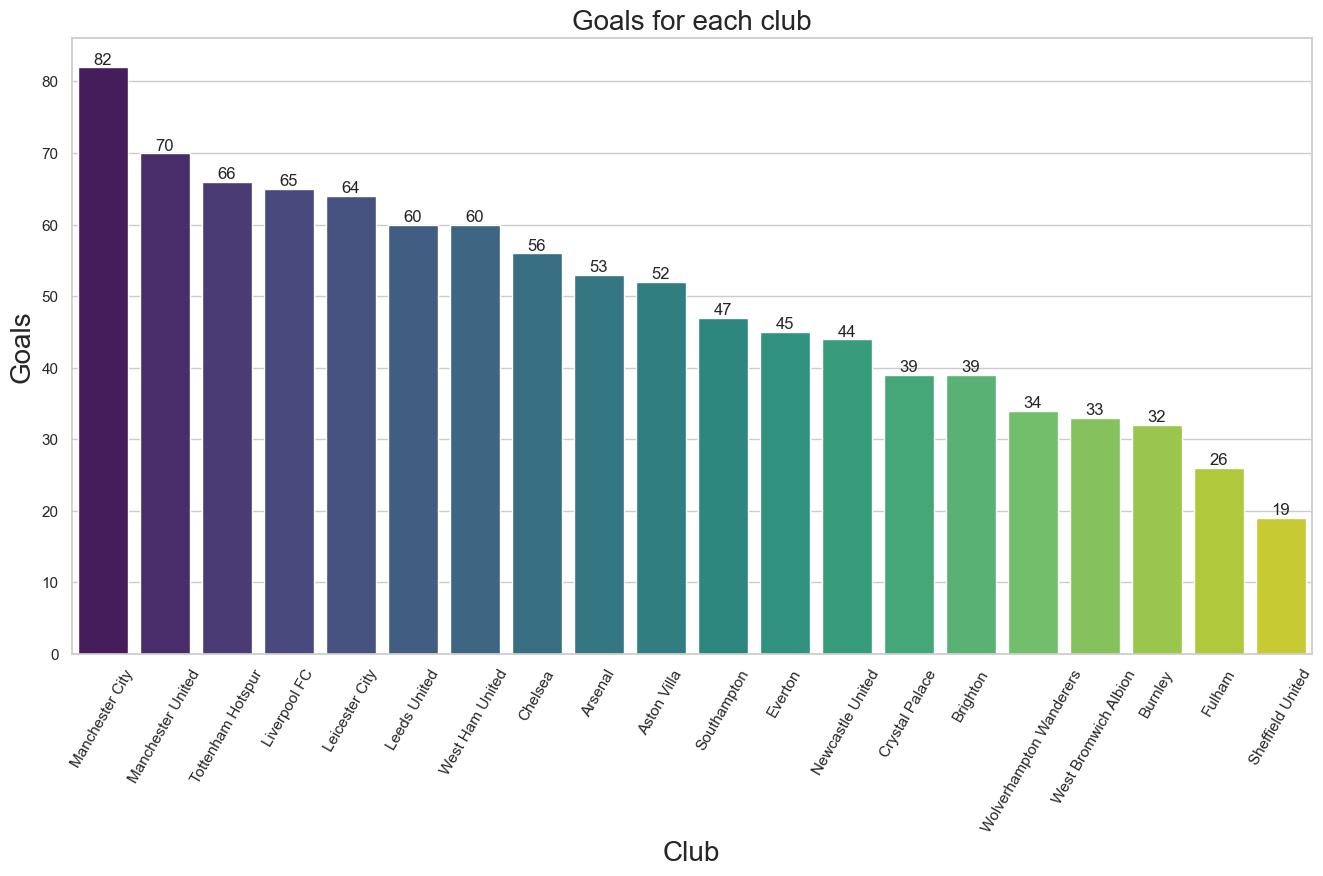

In [119]:
# Total goals from each club
Goals_by_club = df.groupby(['Club'], as_index = False)['Goals'].sum().sort_values(by = 'Goals', ascending = False)
sns.set_theme(style = 'whitegrid', color_codes = True)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='Club',y='Goals',data =Goals_by_club,palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Club', fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Goals', fontsize = 20)
plt.title('Goals for each club', fontsize = 20)
plt.show()

### From the above two graphs, we can conclude that Manchester City has been the most prolific in front of goal with 82 goals and a total of 55 assists coming from the club.

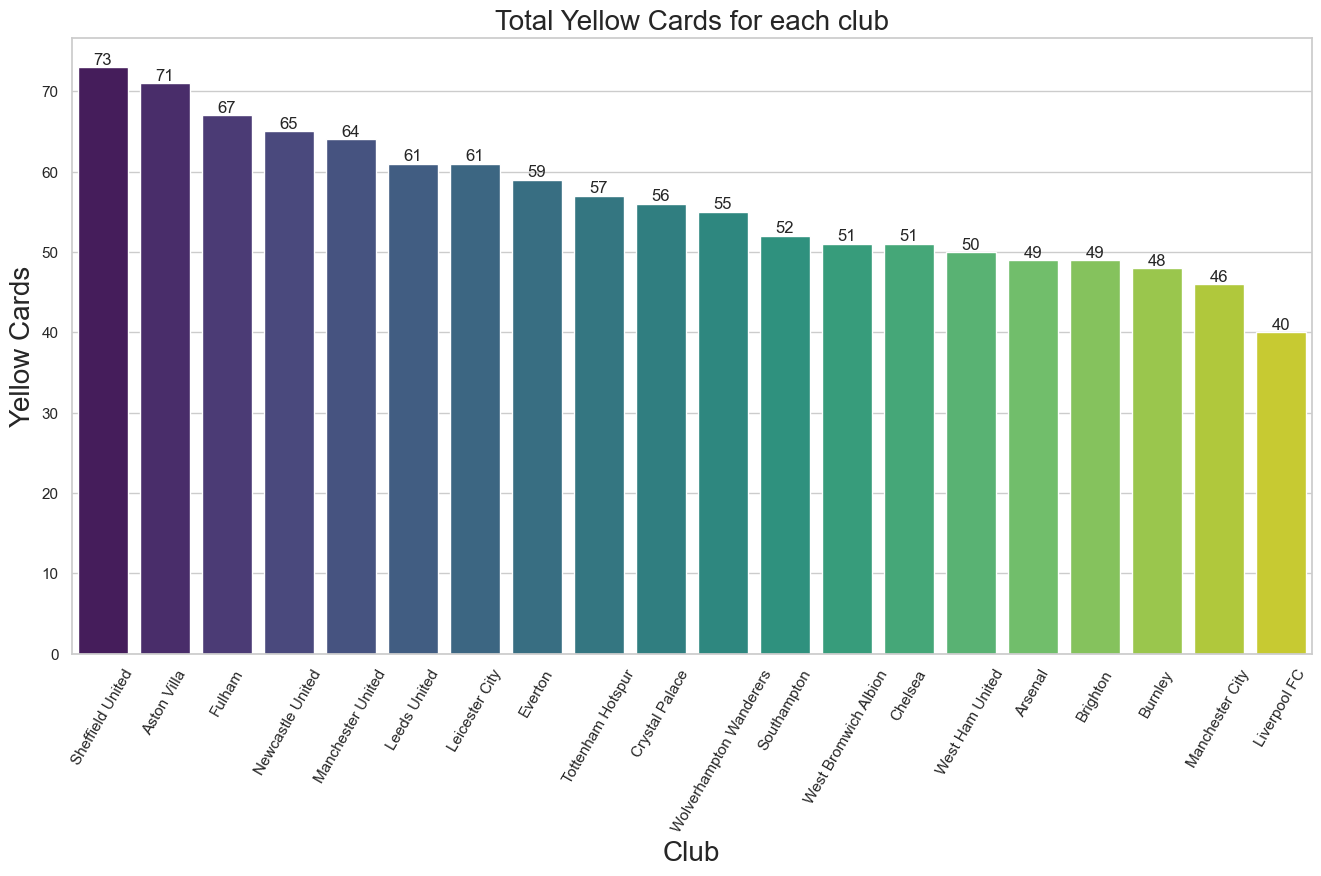

In [99]:
# Total yellow cards from each club
Yellow_Cards_by_club = df.groupby(['Club'], as_index = False)['Yellow_Cards'].sum().sort_values(by = 'Yellow_Cards', ascending = False)
sns.set_theme(style = 'whitegrid', color_codes = True)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='Club',y='Yellow_Cards',data =Yellow_Cards_by_club,palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Club', fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Yellow Cards', fontsize = 20)
plt.title('Total Yellow Cards for each club', fontsize = 20)
plt.show()

### From the above graph, it can be concluded that Sheffield United, Aston Villa and Fulham were among the most physcial teams as they have accumuated the highest number of yellow cards for committed fouls.

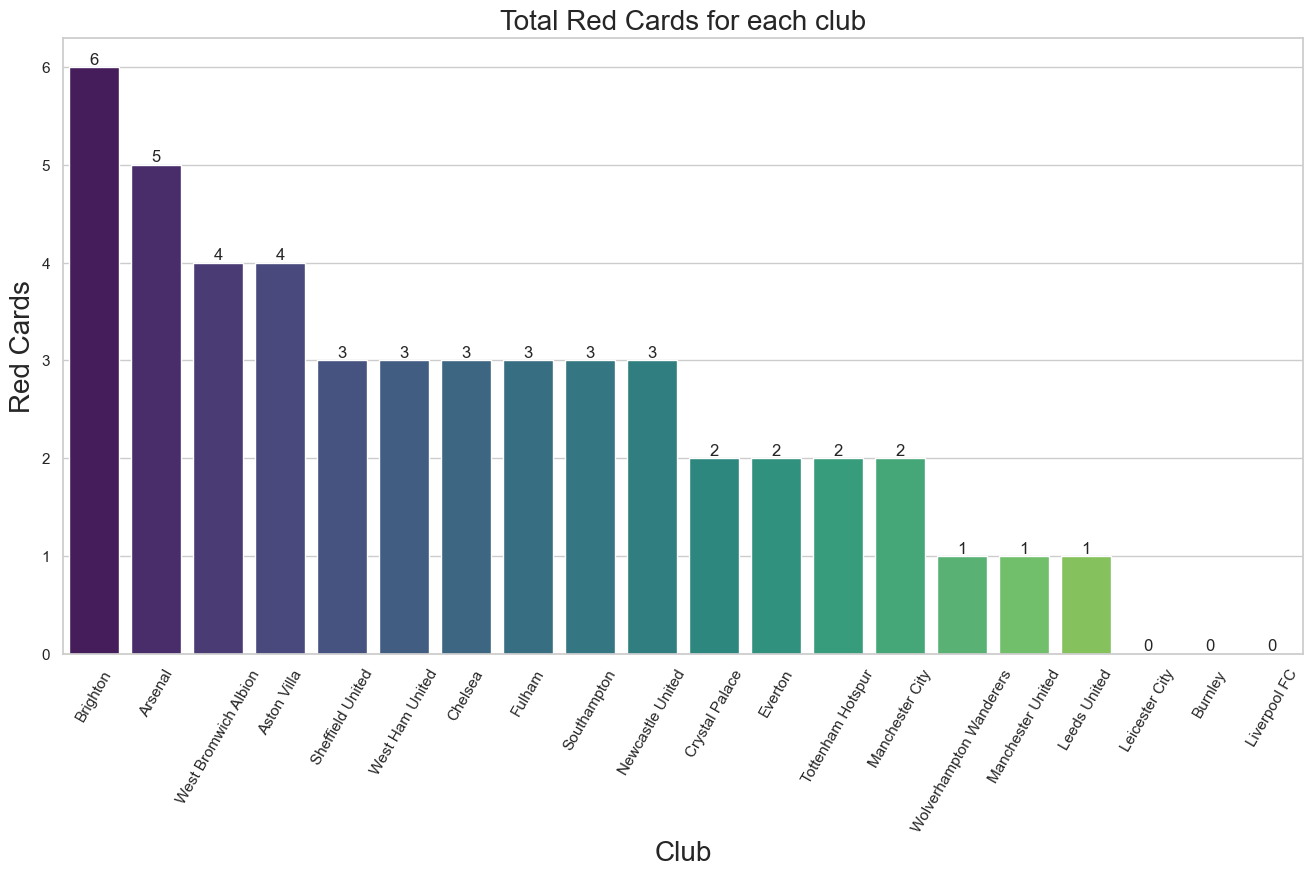

In [100]:
# Total red cards from each club
Red_Cards_by_club = df.groupby(['Club'], as_index = False)['Red_Cards'].sum().sort_values(by = 'Red_Cards', ascending = False)
sns.set_theme(style = 'whitegrid', color_codes = True)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='Club',y='Red_Cards',data =Red_Cards_by_club,palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Club', fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Red Cards', fontsize = 20)
plt.title('Total Red Cards for each club', fontsize = 20)
plt.show()

### From the above graph, it can be concluded that Brighton and Arsenal had the most number of red cards, indicating a sense of indiscipline amongst the team.

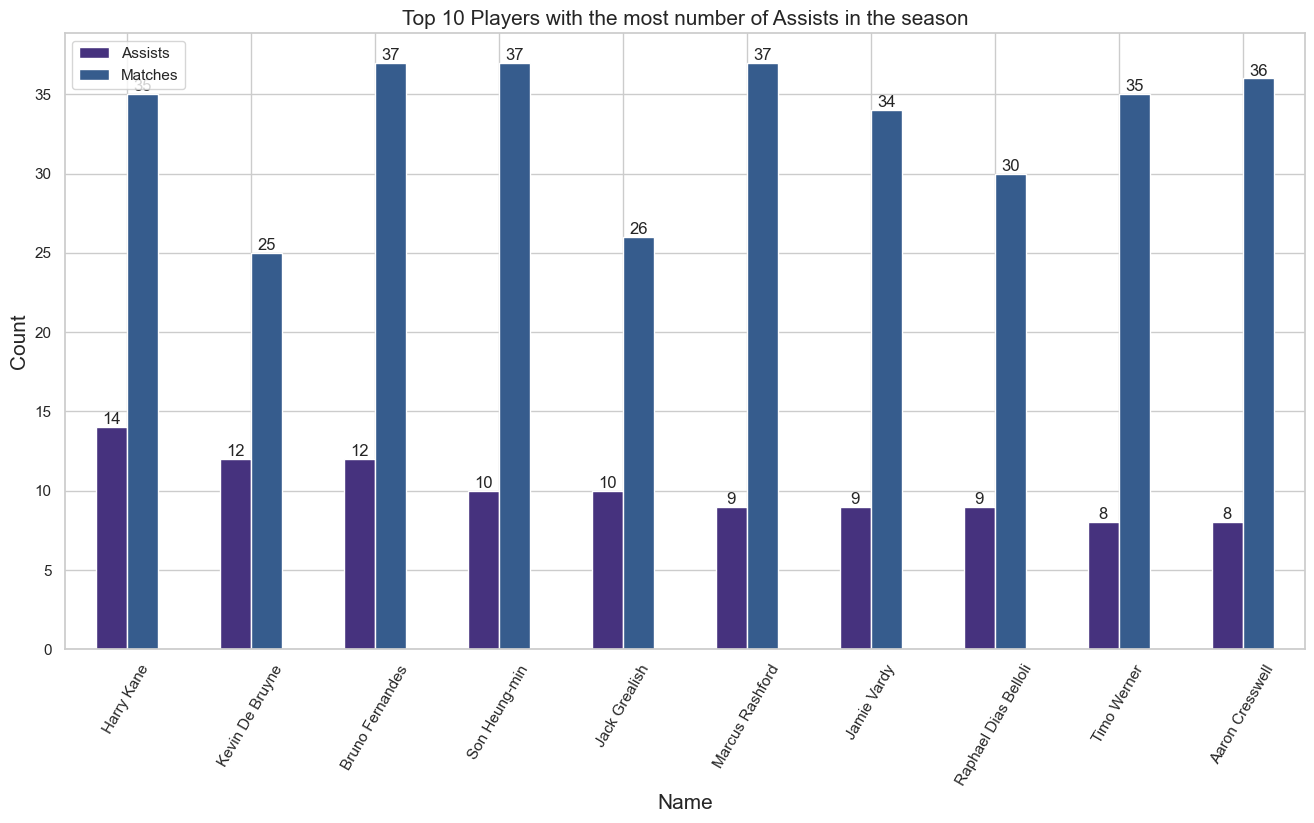

In [116]:
# Players with the most number of Assists in the season
ax = top_10_assists = df[['Name','Club','Assists','Matches']].nlargest(n = 10, columns = 'Assists').plot(kind = 'bar', x='Name', color = sns.color_palette('viridis'), figsize = (16,8))
plt.xticks(rotation = 60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Top 10 Players with the most number of Assists in the season',fontsize = 15)
plt.show()

### The above graph shows the top 10 playes with the most assists in the season. Hary Kane leads the chart followed by KDB and Bruno Fernandes.

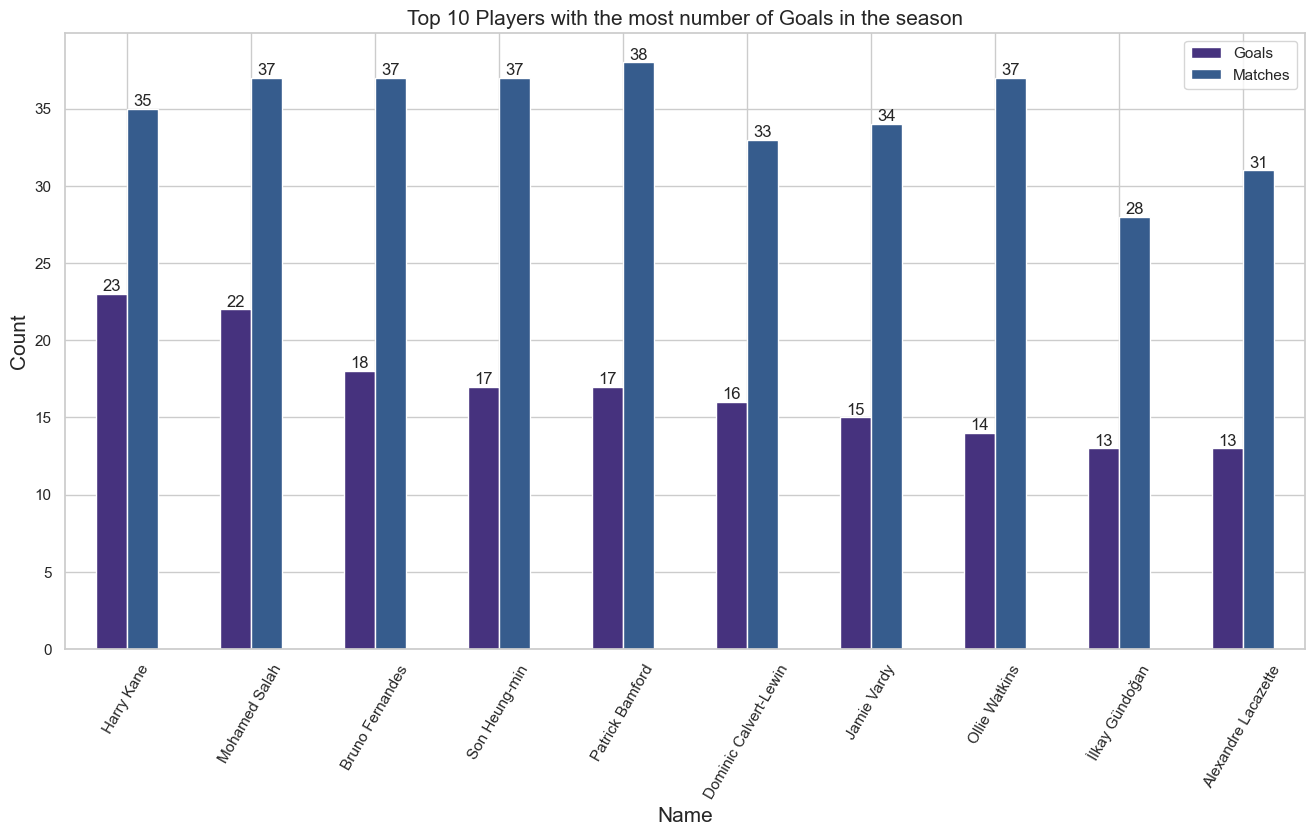

In [117]:
# Players with the most number of Goals in the season
ax = top_10_goals = df[['Name','Club','Goals','Matches']].nlargest(n = 10, columns = 'Goals').plot(kind = 'bar', x='Name', color = sns.color_palette('viridis'), figsize = (16,8))
plt.xticks(rotation = 60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Top 10 Players with the most number of Goals in the season',fontsize = 15)
plt.show()

### The above graph shows the top 10 playes with the most goals in the season. Hary Kane leads the chart followed by Mohammed Salah and Bruno Fernandes.

# So in terms of being prolific in front of goal or having the highest goal contrinutions in the season, Harry Kane leads the chart followed by Bruno Fernandes.

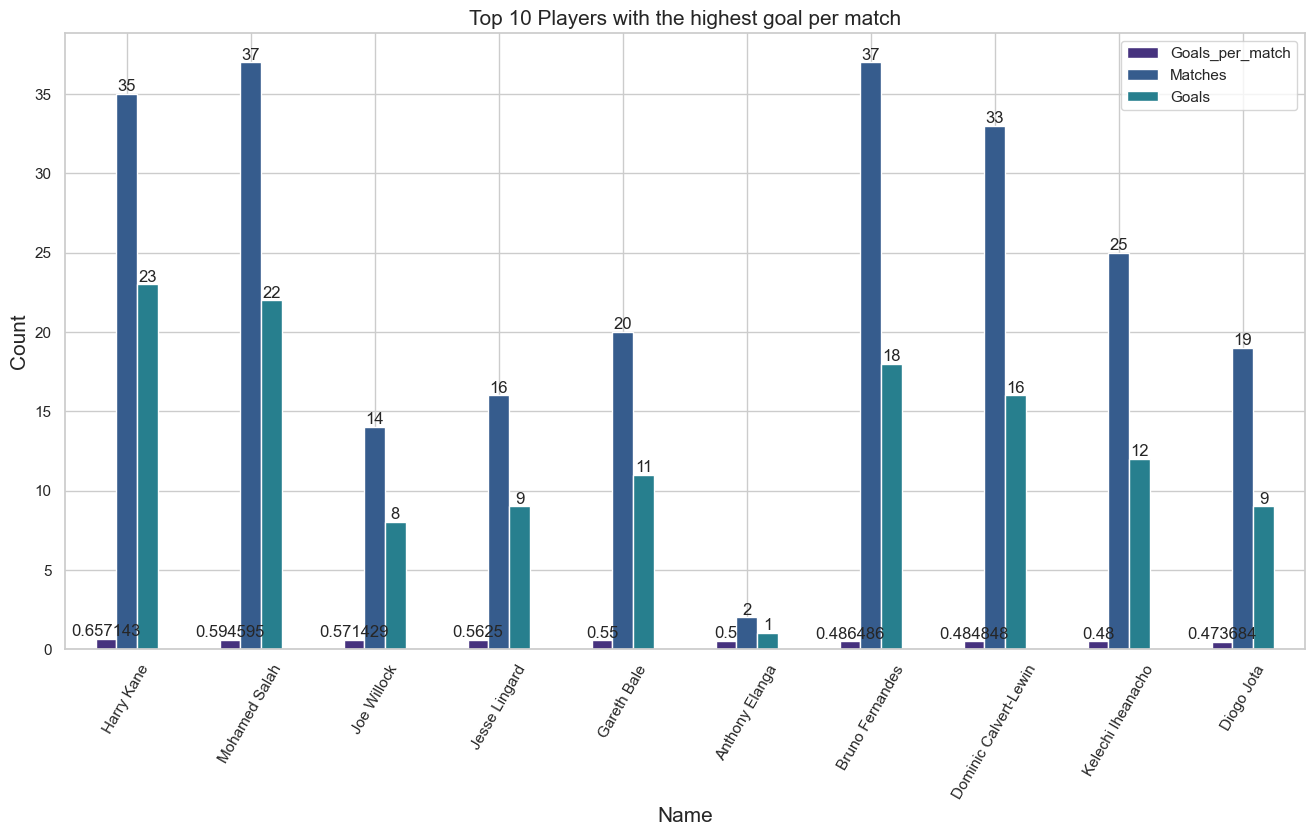

In [121]:
# Goals per match
ax = top_10_goals_per_match = df[['Name','Goals_per_match','Club','Matches','Goals']].nlargest(n=10,columns ='Goals_per_match',).plot(kind = 'bar', x='Name', color = sns.color_palette('viridis'), figsize = (16,8))
plt.xticks(rotation = 60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Top 10 Players with the highest goal per match',fontsize = 15)
plt.show()

### From the above graph, we can conclude that Harry Kane has been the most prolific players in terms of scoring goals, with a ratio 0.65 goals per match, followed by Salah at 0.59 goals per match.

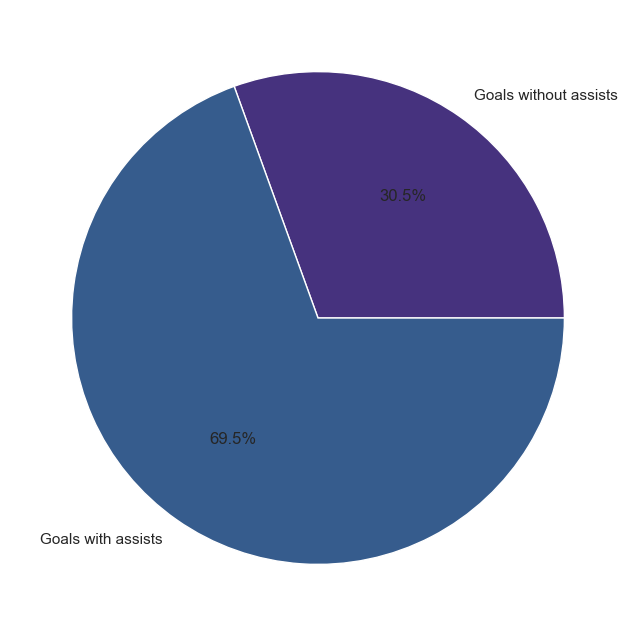

In [141]:
# Goals with assist and without assist
plt.figure(figsize=(16,8))
assists = df['Assists'].sum()
data = [total_goals - assists, assists]
labels = ['Goals without assists','Goals with assists']
color = sns.color_palette('viridis')
plt.pie(data, labels= labels, colors = color, autopct = '%.1f%%')
plt.show()

### From the above pie chart, it is clear that almost 70% of the goals scored in the season were provided by an assist.

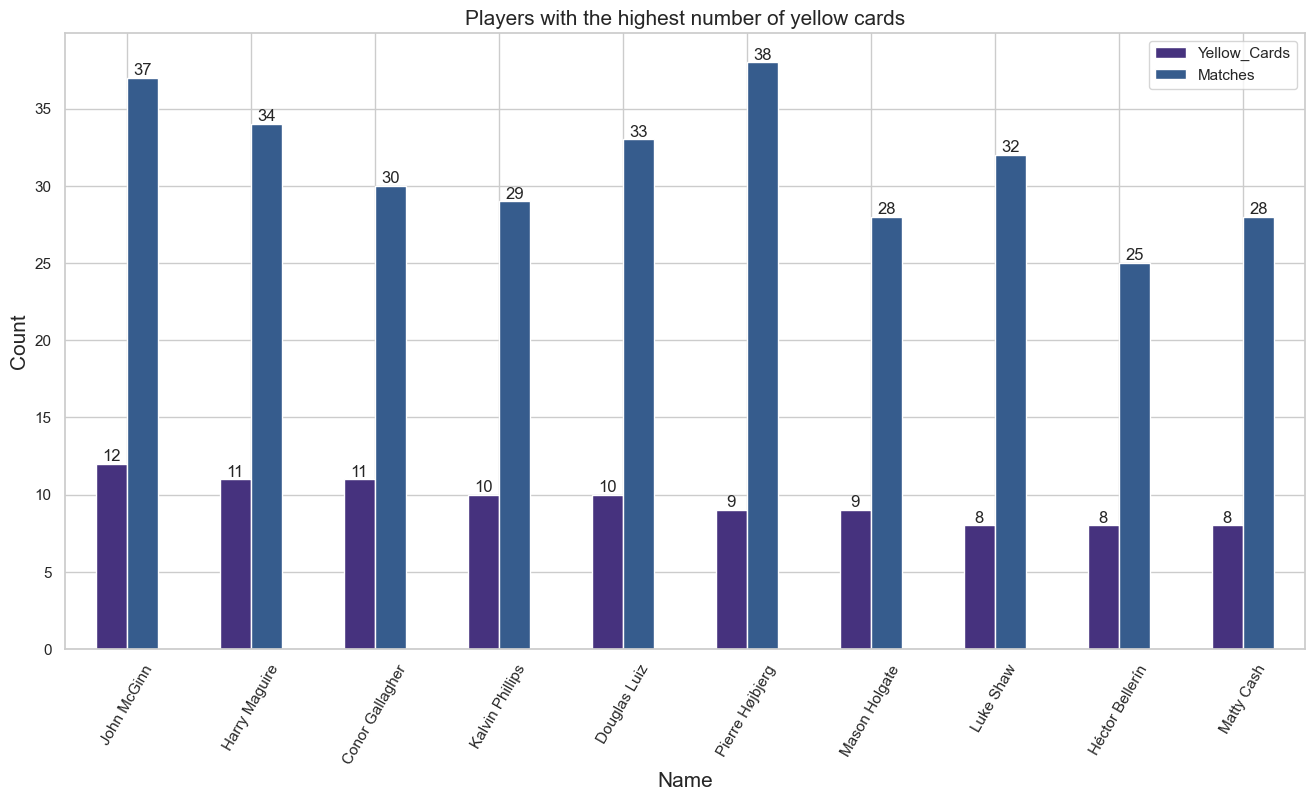

In [139]:
# top 10 players with most yellow cards
ax = top_10_players_with_yellow = df[['Name','Yellow_Cards','Matches']].nlargest(n = 10, columns = 'Yellow_Cards').plot(kind = 'bar', x='Name', color = sns.color_palette('viridis'), figsize = (16,8))
plt.xticks(rotation = 60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Players with the highest number of yellow cards',fontsize = 15)
plt.show()

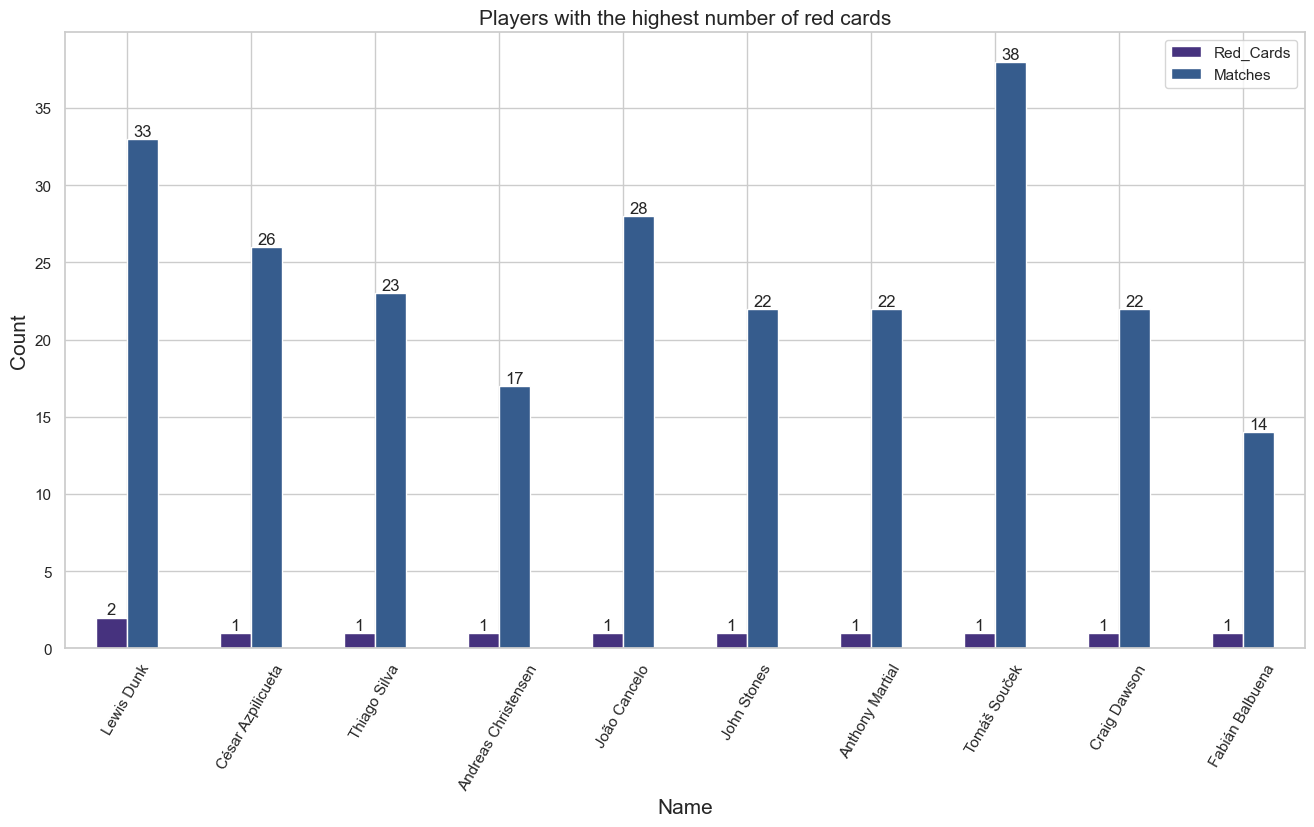

In [140]:
# top 10 players with most red cards
ax = top_10_players_with_red = df[['Name','Red_Cards','Matches']].nlargest(n = 10, columns = 'Red_Cards').plot(kind = 'bar', x='Name', color = sns.color_palette('viridis'), figsize = (16,8))
plt.xticks(rotation = 60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Players with the highest number of red cards',fontsize = 15)
plt.show()